[ 726.66666667  645.          571.66666667  488.33333333  403.33333333
  331.66666667  250.          176.66666667   95.           15.        ]


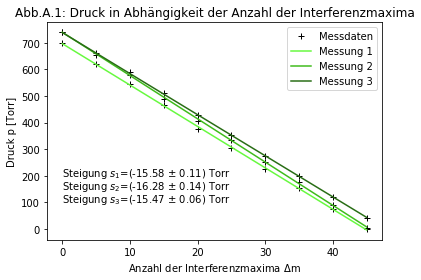

In [12]:
a = np.arange(0,50,5)
p1 = np.array([700,620,545,465,375,305,225,155,75,0])
p2 = np.array([740,655,590,490,405,335,250,175,90,5])
p3 = np.array([740,660,580,510,430,355,275,200,120,40])

p = (p1 + p2 + p3)/3

print(p)
def linear(x,m,b):
    return m*x+b

plt.plot(a,p1, linestyle="none", marker="+", color="black", label="Messdaten")
plt.plot(a,p2, linestyle="none", marker="+", color="black")
plt.plot(a,p3, linestyle="none", marker="+", color="black")

popt,pcov = curve_fit(linear,a,p1)
plt.plot(a,linear(a,*popt), color="#67F93F", label="Messung 1")

popt2,pcov2 = curve_fit(linear,a,p2)
plt.plot(a,linear(a,*popt2), color="#3EBB1B", label="Messung 2")

popt3,pcov3 = curve_fit(linear,a,p3)
plt.plot(a,linear(a,*popt3), color="#286D15", label="Messung 3")

plt.title("Abb.A.1: Druck in Abhängigkeit der Anzahl der Interferenzmaxima")
plt.xlabel("Anzahl der Interferenzmaxima $\Delta$m")
plt.ylabel("Druck p [Torr]")
plt.text(0,200,"Steigung $s_1$=({} $\pm$ {}) Torr".format(round(popt[0],2),round(np.sqrt(pcov[0][0]),2)))
plt.text(0,150,"Steigung $s_2$=({} $\pm$ {}) Torr".format(round(popt2[0],2),round(np.sqrt(pcov2[0][0]),2)))
plt.text(0,100,"Steigung $s_3$=({} $\pm$ {}) Torr".format(round(popt3[0],2),round(np.sqrt(pcov3[0][0]),2)))
plt.legend()
plt.savefig("232_1.pdf", format="pdf")


0.0364457736212
0.034975739364
0.0166247886274


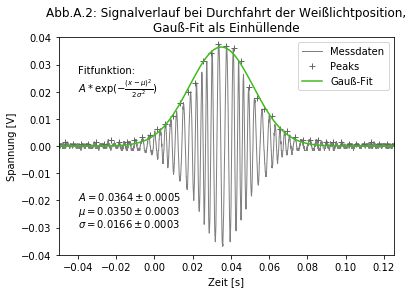

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.optimize import curve_fit

y = genfromtxt('NewFile0.txt.csv', delimiter=',', autostrip = True, usecols = (1))
x = genfromtxt('NewFile0.txt.csv', delimiter=',', autostrip = True, usecols = (0))
plt.plot(x,y, color="grey", linewidth=1, label="Messdaten")

plt.xlim(-0.05,0.125)
plt.ylim(-0.04,0.04)

U1=[]
t1=[]
for i in range(1,150):
    U1.append(np.amax(y[(i-1)*100:i*100]))
    t1.append(np.mean(x[(i-1)*100:i*100]))    
U=np.array(U1)
t=np.array(t1)
plt.plot(t,U, color='#676767', marker="+", linestyle="None", label="Peaks")

def gaus(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

popt,pcov=curve_fit(gaus,t,U, p0= [1,0.05,0.05])
c= np.linspace(-0.05,0.125,150)
plt.plot(c,gaus(c,*popt), color="#3EBB1B", label="Gauß-Fit")

plt.text(-0.04,-0.020,"$A={}\pm {}$".format(round(popt[0],4),round(np.sqrt(pcov[0][0]),4)))
plt.text(-0.04,-0.025,"$\mu={}0\pm {}$".format(round(popt[1],4),round(np.sqrt(pcov[1][1]),4)))
plt.text(-0.04,-0.030,"$\sigma={}\pm {}$".format(round(popt[2],4),round(np.sqrt(pcov[2][2]),4)))

plt.text(-0.04,0.027,"Fitfunktion:")
plt.text(-0.04,0.020,r"$A*\exp{({ -\frac{ (x-\mu)^2 }{ 2\sigma^2 })} }$")


plt.title("Abb.A.2: Signalverlauf bei Durchfahrt der Weißlichtposition,\nGauß-Fit als Einhüllende")
plt.xlabel("Zeit [s]")
plt.ylabel("Spannung [V]")
plt.legend()

print(popt[0])
print(popt[1])
print(popt[2])

plt.savefig("232_2.pdf", format="pdf")

# L=2*v*hwb
# hwb=2,35*sgma

#### 